In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/CS506 Spark Fairhouse Team1 Coding/data/addresses_census_tract/

Mounted at /content/drive
/content/drive/Shareddrives/CS506 Spark Fairhouse Team1 Coding/data/addresses_census_tract


In [2]:
!ls

average_data.csv      GeocodeResults3.csv  GeocodeResults9.csv
cleaned_data.csv      GeocodeResults4.csv  merged_data.csv
combined_data.csv     GeocodeResults5.csv  msamd_14454.csv
GeocodeResults10.csv  GeocodeResults6.csv  race_avg_data.csv
GeocodeResults1.csv   GeocodeResults7.csv
GeocodeResults2.csv   GeocodeResults8.csv


In [ ]:
import pandas as pd

# Load the CSV file into a pandas dataframe
df = pd.read_csv("msamd_14454.csv")

# Count the number of unique census tracts
num_unique_tracts = len(df["census_tract"].unique())

# Print the result
print("Number of unique census tracts:", num_unique_tracts)


<ipython-input-3-38160517f4b6>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


Number of unique census tracts: 426


In [ ]:
import pandas as pd

# Read the cleaned dataset into a pandas dataframe
cleaned_data = pd.read_csv("cleaned_data.csv", header=None)

# Get unique values in column 13
unique_col_13 = cleaned_data[12].unique()

# Print the number of unique values in column 13
print("Number of unique values in column 13:", len(unique_col_13))
print(cleaned_data[12])

Number of unique values in column 13: 158
0        8009000010
1        8009000010
2       25025050600
3       25025051000
4       25025050600
           ...     
7448    25025051000
7449    25025050600
7450    25025051000
7451    25025050600
7452    25025051000
Name: 12, Length: 7453, dtype: int64


In [56]:
import pandas as pd

# Load the msamd_14454.csv file into a pandas dataframe
msamd_data = pd.read_csv("msamd_14454.csv")
msamd_data.dropna(subset=["derived_race", "derived_sex", "census_tract", "loan_amount", "interest_rate", "loan_term", "property_value", "income", "action_taken"], inplace=True)
print(len(msamd_data))

msamd_data["interest_rate"] = pd.to_numeric(msamd_data["interest_rate"], errors="coerce")
msamd_data["loan_term"] = pd.to_numeric(msamd_data["loan_term"], errors="coerce")
msamd_data["property_value"] = pd.to_numeric(msamd_data["property_value"], errors="coerce")
# msamd_data["action_taken"] = msamd_data["action_taken"].map(lambda x: 1 if x in [1, 2] else 3)
msamd_data['loan_amount'] = pd.to_numeric(msamd_data['loan_amount'], errors='coerce')

msamd_data["action_taken"] = msamd_data["action_taken"].map({1: "Approved", 2: "Approved", 3: "Denied", 4: "Denied", 5: "Denied", 6: "Denied", 7: "Denied", 8: "Denied"})

# group by census tract and calculate approval and denial counts
grouped_data = msamd_data.groupby("census_tract")["action_taken"].value_counts().unstack().fillna(0)
grouped_data["num_approvals"] = grouped_data["Approved"]
grouped_data["num_denials"] = grouped_data["Denied"]
grouped_data.drop(["Approved", "Denied"], axis=1, inplace=True)

# calculate total records and approval rate for each census tract
grouped_data["total_records"] = grouped_data["num_approvals"] + grouped_data["num_denials"]
grouped_data["approval_rate"] = grouped_data["num_approvals"] / grouped_data["total_records"]

# Calculate the average loan_amount, interest_rate, loan_term, property_value, and income
# for each unique census_tract and store in a new dataframe
avg_data = msamd_data.groupby("census_tract").agg(
    {"loan_amount": "mean", "interest_rate": "mean", "loan_term": "mean", "property_value": "mean", "income": "mean"}
)
# Merge the two dataframes based on census_tract
merged_data = pd.merge(grouped_data, avg_data, on="census_tract")
merged_data['num_tracts'] = msamd_data['census_tract'].value_counts()

# Save the merged dataframe to a new csv file
merged_data.to_csv("avg_data.csv", index=True)

<ipython-input-56-7d375e6ebb91>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  msamd_data = pd.read_csv("msamd_14454.csv")


105636


In [45]:
average_data = pd.read_csv("avg_data.csv")

In [46]:
average_data.head()

,census_tract,num_approvals,num_denials,total_records,approval_rate,loan_amount,interest_rate,loan_term,property_value,income
0,2.502140e+10,163.0,8.0,171.0,0.953216,814824.561404,2.767958,326.155689,1.818234e+06,421.204678
1,2.502140e+10,189.0,14.0,203.0,0.931034,554064.039409,2.825840,320.376289,1.197835e+06,238.330049
2,2.502140e+10,182.0,9.0,191.0,0.952880,732958.115183,2.821282,320.414894,1.598032e+06,282.015707
3,2.502140e+10,247.0,17.0,264.0,0.935606,657045.454545,2.797135,323.261538,1.329269e+06,270.511364
4,2.502140e+10,186.0,12.0,198.0,0.939394,691464.646465,2.834299,331.463918,1.410361e+06,294.606061


In [65]:


# Load the msamd_14454.csv file into a pandas dataframe
msamd_data = pd.read_csv("msamd_14454.csv")
msamd_data.dropna(subset=["derived_race", "derived_sex", "census_tract", "loan_amount", "interest_rate", "loan_term", "property_value", "income", "action_taken"], inplace=True)
print(len(msamd_data))

msamd_data["interest_rate"] = pd.to_numeric(msamd_data["interest_rate"], errors="coerce")
msamd_data["loan_term"] = pd.to_numeric(msamd_data["loan_term"], errors="coerce")
msamd_data["property_value"] = pd.to_numeric(msamd_data["property_value"], errors="coerce")
msamd_data['loan_amount'] = pd.to_numeric(msamd_data['loan_amount'], errors='coerce')

msamd_data["action_taken"] = msamd_data["action_taken"].map({1: "Approved", 2: "Approved", 3: "Denied", 4: "Denied", 5: "Denied", 6: "Denied", 7: "Denied", 8: "Denied"})

# group by census tract, derived_race, and action_taken, and calculate approval and denial counts
grouped_data = msamd_data.groupby(["census_tract", "derived_race", "action_taken"])["loan_amount"].count().unstack().fillna(0)
grouped_data.reset_index(inplace=True)

# Calculate total records and approval rate for each census tract, derived_race combination
grouped_data["num_approvals"] = grouped_data["Approved"]
grouped_data["num_denials"] = grouped_data["Denied"]
grouped_data.drop(["Approved", "Denied"], axis=1, inplace=True)
grouped_data["total_records"] = grouped_data["num_approvals"] + grouped_data["num_denials"]
grouped_data["approval_rate"] = grouped_data["num_approvals"] / grouped_data["total_records"]

# Calculate the average loan_amount, interest_rate, loan_term, property_value, and income
# for each unique census_tract and store in a new dataframe
avg_data = msamd_data.groupby(["census_tract", "derived_race"]).agg(
    {"loan_amount": "mean", "interest_rate": "mean", "loan_term": "mean", "property_value": "mean", "income": "mean"}
)
avg_data.reset_index(inplace=True)

# Merge the two dataframes based on census_tract and derived_race
merged_data = pd.merge(grouped_data, avg_data, on=["census_tract", "derived_race"])

# Save the merged dataframe to a new csv file
merged_data.to_csv("avg_race_data.csv", index=False)



<ipython-input-65-5f276f7257af>:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  msamd_data = pd.read_csv("msamd_14454.csv")


105636


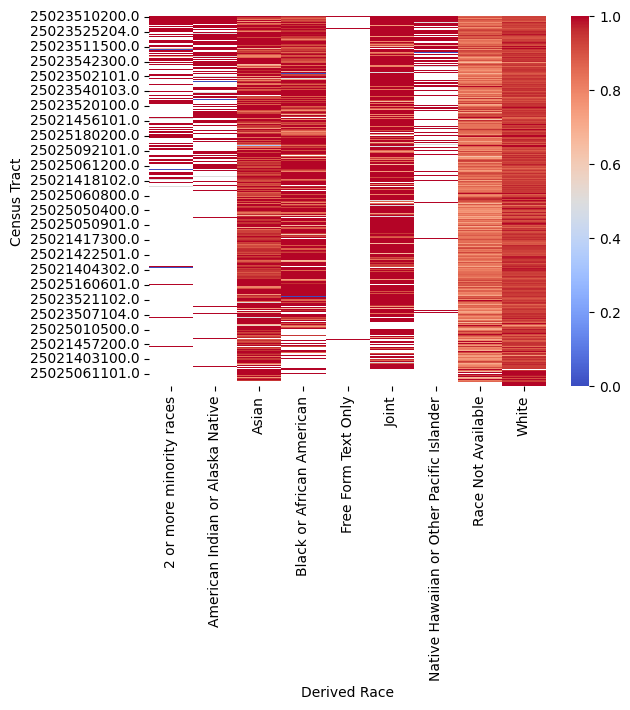

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged_data.csv file into a pandas dataframe
merged_data = pd.read_csv("avg_race_data.csv")

# Group the dataframe by census tract and count the number of participants
count_data = merged_data.groupby("census_tract").size().reset_index(name="count")

# Sort the count_data dataframe by the "count" column in descending order
count_data = count_data.sort_values(by="count", ascending=False)

# Pivot the dataframe to create a new dataframe where each row represents a census tract and each column represents a derived race
pivot_data = merged_data.pivot(index='census_tract', columns='derived_race', values='approval_rate')

# Reorder the rows of the pivot_data dataframe based on the sorted census_tract values
pivot_data = pivot_data.loc[count_data["census_tract"]]

# Plot the heatmap using seaborn
sns.heatmap(pivot_data, cmap='coolwarm')

# Set the x and y labels
plt.xlabel('Derived Race')
plt.ylabel('Census Tract')

# Show the plot
plt.show()


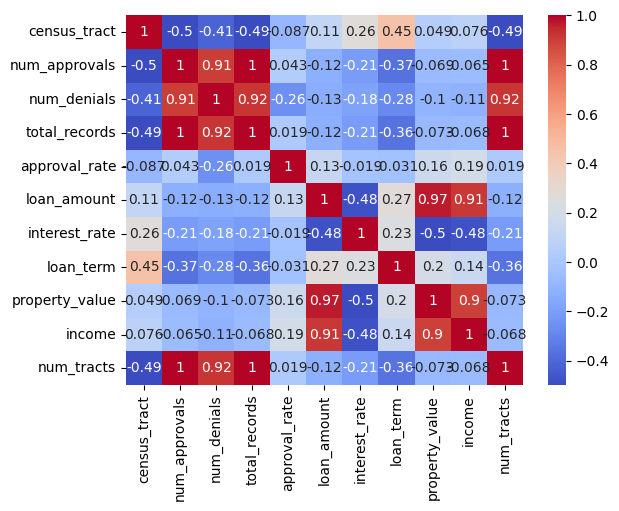

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged_data.csv file into a pandas dataframe
merged_data = pd.read_csv("avg_data.csv")

# Calculate the correlation matrix
corr_matrix = merged_data.corr()

# Plot the heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()



In [94]:

import pandas as pd

# Load the cleaned_data.csv file into a pandas dataframe
data = pd.read_csv("cleaned_data.csv")

# Group the data by census tract and get the list of addresses for each group
grouped_data = data.groupby("cesus_tract")["INPUT ADDRESS"].apply(list)

# Create a new dataframe with the census tract and corresponding list of addresses
output_data = pd.DataFrame({"census_tract": grouped_data.index, "addresses": grouped_data.values})

# Save the output dataframe to a new CSV file
output_data.to_csv("addresses_by_census_tract.csv", index=False)


In [96]:
# Load the cleaned_data.csv file into a pandas dataframe
data = pd.read_csv("cleaned_data.csv")
print(data.iloc[:, 12])
# Group the data by census tract and get the list of addresses for each group
grouped_data = data.groupby("cesus_tract")["INPUT ADDRESS"].apply(list)

# Print the list of addresses for each unique census tract
for census_tract, addresses in grouped_data.items():
    print(f"Census Tract {census_tract}:")
    for address in addresses:
        print(f"- {address}")
    print("\n")

Streaming output truncated to the last 5000 lines.
- 31 RUSSELL ST, CHARLESTOWN, MA, 02129
- 29 RUSSELL ST, CHARLESTOWN, MA, 02129
- 334  336 BUNKER HILL ST, CHARLESTOWN, MA, 02129
- 340 BUNKER HILL ST, CHARLESTOWN, MA, 02129
- 17 RUSSELL ST, CHARLESTOWN, MA, 02129
- 21 RUSSELL ST, CHARLESTOWN, MA, 02129
- 19 RUSSELL ST, CHARLESTOWN, MA, 02129
- 25 RUSSELL ST, CHARLESTOWN, MA, 02129
- 23 RUSSELL ST, CHARLESTOWN, MA, 02129
- 53 WALKER ST, CHARLESTOWN, MA, 02129
- 47 RUSSELL ST, CHARLESTOWN, MA, 02129
- 18 WALL ST, CHARLESTOWN, MA, 02129
- 19 WALL ST, CHARLESTOWN, MA, 02129
- 35 RUSSELL ST, CHARLESTOWN, MA, 02129
- 33 RUSSELL ST, CHARLESTOWN, MA, 02129
- 39 RUSSELL ST, CHARLESTOWN, MA, 02129
- 37 RUSSELL ST, CHARLESTOWN, MA, 02129
- 43 RUSSELL ST, CHARLESTOWN, MA, 02129
- 41 RUSSELL ST, CHARLESTOWN, MA, 02129
- 45 RUSSELL ST, CHARLESTOWN, MA, 02129
- 11 WALL ST, CHARLESTOWN, MA, 02129
- 9 WALL ST, CHARLESTOWN, MA, 02129
- 10 WALL ST, CHARLESTOWN, MA, 02129
- 7 WALL ST, BOSTON, MA, 02205
